## Obervations and Analysis

The analysis shows that in the Southern Hemisphere the temperature rises relatively linearly as we approach the equator (Latitude of 0), there is a strong positive correlation between the temperature and the latitude is with an r-value of 0.814. Meanwhile in the Northern Hemisphere the temperature also rises somewhat linearly as we approach the equator, however it is only a moderately strong negative correlation between the temperature and the latitude with an r-value of 0.603. Therefore, we can infer that the temperature as we approach the equator rises, and we have more confidence in this data in the Southern Hemisphere than we do in the Northerm Hemisphere. It is worth considering the effect that the seasons are having on this data.

The findings from the data also shows that in both the Northern and Southern Hemisphere, the Humidity and cloudiness are relatively evenly distributed for the 500 cities around the world. There is no condfidence that the data shows any linear distribution in the Northern and Southern Hemispheres, with r-values of 0.041 and -0.173 for cloudiness respectively, and -0.011 and -0.140 for humidity respectively. With all r-values within 0.2 of 0, it clear that the data is not linearly distributed for either the Nothern and Southern Hemispheres. Again it is worth considering the effect that the seasons have on the humidity and cloudiness of any particular location, this is likely more of a bearing on these 

Finally, the data shows that wind speed in both the Northern and Southern Hemispheres are also evenly distributed, with little to no evidence that latitude has any effect on the wind speed. The r-value for the linear regression for the Northern Hemisphere is -0.02 and -0.05 in the Southern Hemisphere. It is more likely that the wind speeds of any particular city would be more affected by the terrain, the rotation of the Earth, and the air pressure of a given location. While temperature does play a part on wind speed, it should be noted that the data gathers was discussing only the maximum temperature of the city itself, and wind speed is affected by changes in temperature, rather than max temperature. Without surrounding area data, and minimum temperature data, and wind direction data, it is hard to make any conclusions regarding the correlation between wind speed and latitude.

In [1]:
from config import api_key
import pandas as pd
import numpy as np
import requests
import json
from citipy import citipy
import random
import matplotlib.pyplot as plt
from scipy.stats import linregress
import os

In [2]:
output_dir = os.path.join('.','output')
target_city_count = 500
columns = ['City','Country','Latitude','Longitude','Temperature (C)','Humidity (%)','Cloudiness (%)','Wind Speed (m/s)','Datetime']
city_df = pd.DataFrame(columns=columns)

#base_url and units of measurement for the api calls
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
lat_range = [-90,90]
lng_range = [-180,180]


In [3]:

called_cities = []
current_count = len(called_cities)
while current_count < target_city_count:
    #generate 2 random numbers for lat and long
    attempt_lat = random.randint(lat_range[0],lat_range[1])
    attempt_lng = random.randint(lng_range[0],lng_range[1])
    #Find the nearest city to that point
    city = citipy.nearest_city(attempt_lat,attempt_lng).city_name
    if city not in called_cities:
        query_url = f"{url}appid={api_key}&units={units}&q="   
        try:
           #find the true co-ordinates of the city
            response = requests.get(query_url + city).json()
            #Nicely formatted name
            true_city = response['name']
            country = response['sys']['country']
            true_lat = response['coord']['lat']
            true_lng = response['coord']['lon']
             #Find the weather for that city
            temp = response['main']['temp_max']
            humidity = response['main']['humidity']
            cloudiness = response['clouds']['all']
            wspeed = response['wind']['speed']
            datetime = response['dt']
            to_append = [true_city,country,true_lat,true_lng,temp,humidity,cloudiness,wspeed,datetime]
            append_series = pd.Series(to_append, index=city_df.columns)
            city_df = city_df.append(append_series,ignore_index=True)
            called_cities.append(city)
            current_count += 1
            print(f"Successfully pulled weather info on {true_city} | {current_count} of {target_city_count}")

            #print(to_append)
        except Exception:
            print(f"Weather data not found for {city}")
    else:
        print("Randomly generated city was duplicate, generating another random city")

Successfully pulled weather info on Paradise Valley | 1 of 500
Successfully pulled weather info on Ribeira Grande | 2 of 500
Successfully pulled weather info on Hambantota | 3 of 500
Successfully pulled weather info on Ushuaia | 4 of 500
Successfully pulled weather info on Chimoio | 5 of 500
Successfully pulled weather info on Portland | 6 of 500
Successfully pulled weather info on Rikitea | 7 of 500
Successfully pulled weather info on Ilebo | 8 of 500
Successfully pulled weather info on Hermanus | 9 of 500
Successfully pulled weather info on Golden | 10 of 500
Successfully pulled weather info on Pisco | 11 of 500
Successfully pulled weather info on Tiksi | 12 of 500
Successfully pulled weather info on Saskylakh | 13 of 500
Successfully pulled weather info on Padang | 14 of 500
Successfully pulled weather info on Quimper | 15 of 500
Successfully pulled weather info on Klaksvík | 16 of 500
Successfully pulled weather info on Lumeje | 17 of 500
Successfully pulled weather info on Mataura

In [4]:
#Write the city_df to a csv
weather_csv_file = os.path.join(output_dir,'city_weather_data.csv')
city_df.to_csv(weather_csv_file,index=False)

,City,Country,Latitude,Longitude,Temperature (C),Humidity (%),Cloudiness (%),Wind Speed (m/s),Datetime
0,Paradise Valley,US,33.5312,-111.9427,24.39,89,90,0.89,1627217309
1,Ribeira Grande,PT,38.5167,-28.7000,23.22,78,40,3.09,1627217200
2,Hambantota,LK,6.1241,81.1185,30.19,74,75,7.72,1627217310
3,Ushuaia,AR,-54.8000,-68.3000,3.81,81,40,4.63,1627217260
4,Chimoio,MZ,-19.1164,33.4833,15.92,67,75,5.66,1627217312
...,...,...,...,...,...,...,...,...,...
495,Te Anau,NZ,-45.4167,167.7167,8.81,90,100,0.77,1627217784
496,Kushmurun,KZ,52.4503,64.6311,26.39,34,9,6.36,1627217784
497,Aswān,EG,24.0934,32.9070,39.61,12,0,5.88,1627217653
498,Lashma,RU,54.9321,41.1438,22.38,32,71,2.28,1627217786


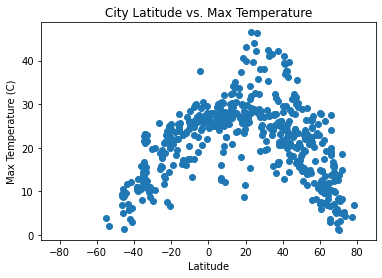

In [21]:
#Latitude vs Temperature Plot
plt.scatter(city_df['Latitude'],city_df['Temperature (C)'])
plt.xlim(lat_range)
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.savefig(os.path.join(output_dir,'Latitude_V_Temp'))
plt.show()

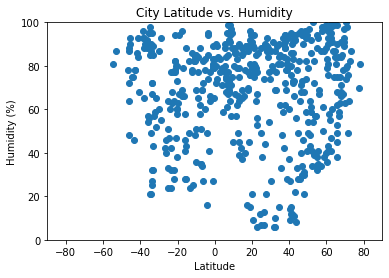

In [19]:
#Latitude vs. Humidity Plot
plt.scatter(city_df['Latitude'],city_df['Humidity (%)'])
plt.xlim(lat_range)
plt.ylim(0,100)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity")
plt.savefig(os.path.join(output_dir,'Latitude_V_Humidity'))
plt.show()

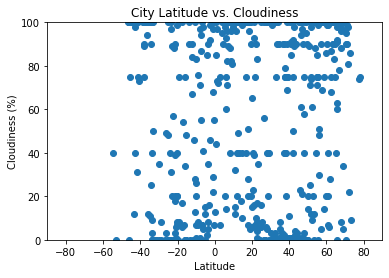

In [7]:
#Latitude vs. Cloudiness Plot
plt.scatter(city_df['Latitude'],city_df['Cloudiness (%)'])
plt.xlim(lat_range)
plt.ylim(0,100)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness")
plt.savefig(os.path.join(output_dir,'Latitude_V_Cloudiness'))
plt.show()


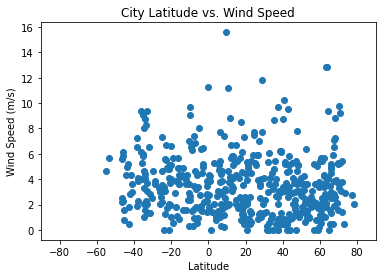

In [8]:
#Latitude vs. Wind Speed Plot
plt.scatter(city_df['Latitude'],city_df['Wind Speed (m/s)'])
plt.xlim(lat_range)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed")
plt.savefig(os.path.join(output_dir,'Latitude_V_Wind_Speed'))
plt.show()


In [9]:
#Make new dataframes for the north and south hemispheres
n_df = city_df[(city_df['Latitude'] > 0)]
s_df = city_df[(city_df['Latitude'] < 0)]
n_df

,City,Country,Latitude,Longitude,Temperature (C),Humidity (%),Cloudiness (%),Wind Speed (m/s),Datetime
0,Paradise Valley,US,33.5312,-111.9427,24.39,89,90,0.89,1627217309
1,Ribeira Grande,PT,38.5167,-28.7000,23.22,78,40,3.09,1627217200
2,Hambantota,LK,6.1241,81.1185,30.19,74,75,7.72,1627217310
5,Portland,US,45.5234,-122.6762,18.11,82,1,2.06,1627217106
9,Golden,US,39.7555,-105.2211,21.68,60,1,0.45,1627217120
...,...,...,...,...,...,...,...,...,...
494,Kamenka,RU,51.3223,42.7678,22.97,43,100,1.54,1627217783
496,Kushmurun,KZ,52.4503,64.6311,26.39,34,9,6.36,1627217784
497,Aswān,EG,24.0934,32.9070,39.61,12,0,5.88,1627217653
498,Lashma,RU,54.9321,41.1438,22.38,32,71,2.28,1627217786


The r-value is -0.6031184656182604


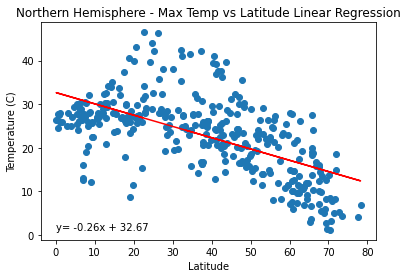

In [22]:
#Northern Hemisphere - Max Temp vs. Latitude Linear Regression
graphing = 'Temperature (C)'
plt.scatter(n_df['Latitude'],n_df[graphing])
slope,intercept,rvalue,_,_ = linregress(n_df['Latitude'],n_df[graphing].astype(float))
lin_regress_model_line = n_df['Latitude'] * slope + intercept
plt.plot(n_df['Latitude'],lin_regress_model_line,color="red")
model_str = f"y= {round(slope,2)}x + {round(intercept,2)}"
plt.annotate(s= model_str,xy=[n_df['Latitude'].min(),int(n_df[graphing].min() * 0.95)])
plt.xlabel('Latitude')
plt.ylabel(graphing)
plt.title('Northern Hemisphere - Max Temp vs Latitude Linear Regression')
print(f"The r-value is {rvalue}")
plt.savefig(os.path.join(output_dir,'Northern_Temp_V_Lat_Linregress'))
plt.show()

The r-value is 0.8139563543696335


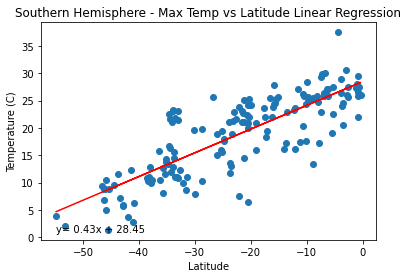

In [11]:
#Southern Hemisphere - Max Temp vs. Latitude Linear Regression
graphing = 'Temperature (C)'
plt.scatter(s_df['Latitude'],s_df[graphing])
slope,intercept,rvalue,_,_ = linregress(s_df['Latitude'],s_df[graphing].astype(float))
lin_regress_model_line = s_df['Latitude'] * slope + intercept
plt.plot(s_df['Latitude'],lin_regress_model_line,color="red")
model_str = f"y= {round(slope,2)}x + {round(intercept,2)}"
plt.annotate(s= model_str,xy=[s_df['Latitude'].min(),int(s_df[graphing].min() * 0.95)])
plt.xlabel('Latitude')
plt.ylabel(graphing)
plt.title('Southern Hemisphere - Max Temp vs Latitude Linear Regression')
print(f"The r-value is {rvalue}")
plt.savefig(os.path.join(output_dir,'Southern_Temp_V_Lat_Linregress'))
plt.show()

The r-value is -0.011595460473199707


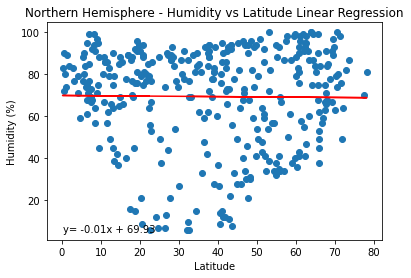

In [12]:
#Northern Hemisphere - Humidity vs. Latitude Linear Regression
graphing = 'Humidity (%)'
plt.scatter(n_df['Latitude'],n_df[graphing])
slope,intercept,rvalue,_,_ = linregress(n_df['Latitude'],n_df[graphing].astype(float))
lin_regress_model_line = n_df['Latitude'] * slope + intercept
plt.plot(n_df['Latitude'],lin_regress_model_line,color="red")
model_str = f"y= {round(slope,2)}x + {round(intercept,2)}"
plt.annotate(s= model_str,xy=[n_df['Latitude'].min(),int(n_df[graphing].min() * 0.95)])
plt.xlabel('Latitude')
plt.ylabel(graphing)
plt.title('Northern Hemisphere - Humidity vs Latitude Linear Regression')
print(f"The r-value is {rvalue}")
plt.savefig(os.path.join(output_dir,'Northern_Humidity_V_Lat_Linregress'))
plt.show()

The r-value is -0.13955840471865286


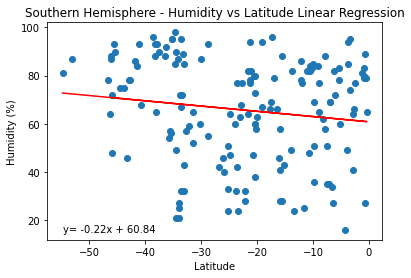

In [13]:
#Southern Hemisphere - Humidity vs. Latitude Linear Regression
graphing = 'Humidity (%)'
plt.scatter(s_df['Latitude'],s_df[graphing])
slope,intercept,rvalue,_,_ = linregress(s_df['Latitude'],s_df[graphing].astype(float))
lin_regress_model_line = s_df['Latitude'] * slope + intercept
plt.plot(s_df['Latitude'],lin_regress_model_line,color="red")
model_str = f"y= {round(slope,2)}x + {round(intercept,2)}"
plt.annotate(s= model_str,xy=[s_df['Latitude'].min(),int(s_df[graphing].min() * 0.95)])
plt.xlabel('Latitude')
plt.ylabel(graphing)
plt.title('Southern Hemisphere - Humidity vs Latitude Linear Regression')
print(f"The r-value is {rvalue}")
plt.savefig(os.path.join(output_dir,'Southern_Humidity_V_Lat_Linregress'))
plt.show()

The r-value is 0.040981127640375016


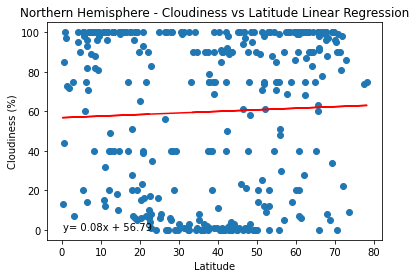

In [14]:
#Northern Hemisphere - Cloudiness vs. Latitude Linear Regression
graphing = 'Cloudiness (%)'
plt.scatter(n_df['Latitude'],n_df[graphing])
slope,intercept,rvalue,_,_ = linregress(n_df['Latitude'],n_df[graphing].astype(float))
lin_regress_model_line = n_df['Latitude'] * slope + intercept
plt.plot(n_df['Latitude'],lin_regress_model_line,color="red")
model_str = f"y= {round(slope,2)}x + {round(intercept,2)}"
plt.annotate(s= model_str,xy=[n_df['Latitude'].min(),int(n_df[graphing].min() * 0.95)])
plt.xlabel('Latitude')
plt.ylabel(graphing)
plt.title('Northern Hemisphere - Cloudiness vs Latitude Linear Regression')
print(f"The r-value is {rvalue}")
plt.savefig(os.path.join(output_dir,'Northern_Cloudiness_V_Lat_Linregress'))
plt.show()

The r-value is -0.17334573097592046


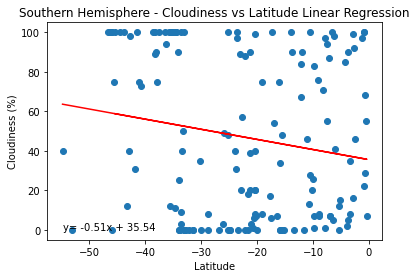

In [15]:
#Southern Hemisphere - Cloudiness vs. Latitude Linear Regression
graphing = 'Cloudiness (%)'
plt.scatter(s_df['Latitude'],s_df[graphing])
slope,intercept,rvalue,_,_ = linregress(s_df['Latitude'],s_df[graphing].astype(float))
lin_regress_model_line = s_df['Latitude'] * slope + intercept
plt.plot(s_df['Latitude'],lin_regress_model_line,color="red")
model_str = f"y= {round(slope,2)}x + {round(intercept,2)}"
plt.annotate(s= model_str,xy=[s_df['Latitude'].min(),int(s_df[graphing].min() * 0.95)])
plt.xlabel('Latitude')
plt.ylabel(graphing)
plt.title('Southern Hemisphere - Cloudiness vs Latitude Linear Regression')
print(f"The r-value is {rvalue}")
plt.savefig(os.path.join(output_dir,'Southern_Cloudiness_V_Lat_Linregress'))
plt.show()

The r-value is -0.022793158464832177


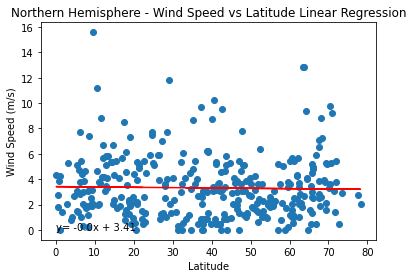

In [16]:
#Northern Hemisphere - Wind Speed vs. Latitude Linear Regression
graphing = 'Wind Speed (m/s)'
plt.scatter(n_df['Latitude'],n_df[graphing])
slope,intercept,rvalue,_,_ = linregress(n_df['Latitude'],n_df[graphing].astype(float))
lin_regress_model_line = n_df['Latitude'] * slope + intercept
plt.plot(n_df['Latitude'],lin_regress_model_line,color="red")
model_str = f"y= {round(slope,2)}x + {round(intercept,2)}"
plt.annotate(s= model_str,xy=[n_df['Latitude'].min(),int(n_df[graphing].min() * 0.95)])
plt.xlabel('Latitude')
plt.ylabel(graphing)
plt.title('Northern Hemisphere - Wind Speed vs Latitude Linear Regression')
print(f"The r-value is {rvalue}")
plt.savefig(os.path.join(output_dir,'Northern_Wind_Speed_V_Lat_Linregress'))
plt.show()

The r-value is -0.05357305932857957


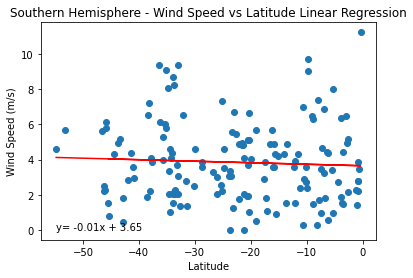

In [17]:
#Southern Hemisphere - Wind Speed vs. Latitude Linear Regression
graphing = 'Wind Speed (m/s)'
plt.scatter(s_df['Latitude'],s_df[graphing])
slope,intercept,rvalue,_,_ = linregress(s_df['Latitude'],s_df[graphing].astype(float))
lin_regress_model_line = s_df['Latitude'] * slope + intercept
plt.plot(s_df['Latitude'],lin_regress_model_line,color="red")
model_str = f"y= {round(slope,2)}x + {round(intercept,2)}"
plt.annotate(s= model_str,xy=[s_df['Latitude'].min(),int(s_df[graphing].min() * 0.95)])
plt.xlabel('Latitude')
plt.ylabel(graphing)
plt.title('Southern Hemisphere - Wind Speed vs Latitude Linear Regression')
print(f"The r-value is {rvalue}")
plt.savefig(os.path.join(output_dir,'Southern_Wind_Speed_V_Lat_Linregress'))
plt.show()